<a href="https://www.kaggle.com/code/saibhossain/text-to-image-generation-with-sdxl?scriptVersionId=290222878" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🌀 Diffusion Models: A Beginner-Friendly Guide

---

### 1️⃣ What Is a Diffusion Model? (Intuition First!)

- **Core idea**: Generate images by **removing noise step-by-step**.
- **Process**:
  1. Start with a clean image (e.g., a face).
  2. **Add noise gradually** until it becomes pure static.
  3. Train a model to **reverse** this process.
  4. At inference: start from **random noise** → **denoise** → generate a **new image**.

> 🎯 **Generation = noise → image**

---

### 2️⃣ Why “Diffusion”?

- Inspired by **physics**: like ink diffusing in water.
- In ML:
  - **Forward**: data → noise (destroy)
  - **Reverse**: noise → data (create)

---

### 3️⃣ Forward Diffusion (No Learning!)

- **Goal**: Destroy the image in a **fixed, known way**.
- Let:
  - $ x_0 $ = original image  
  - $ x_1, x_2, ..., x_T $ = increasingly noisy versions  
  - $ T \approx 1000 $ steps

- **Update rule**:
  $$
  x_t = \sqrt{1 - \beta_t} \, x_{t-1} + \sqrt{\beta_t} \, \epsilon, \quad \epsilon \sim \mathcal{N}(0, I)
  $$
  where $ \beta_t $ is a small noise schedule.

> 📌 **No neural net here**—this process is **deterministic and pre-defined**.

---

### 4️⃣ Reverse Diffusion (Where Learning Happens)

- **Challenge**: Reverse the noise process **without knowing the true clean image**.
- **Solution**: Train a neural network to **predict the noise** added at step $ t $:
  $$
  \epsilon_\theta(x_t, t)
  $$

- **How generation works**:
  1. Start with $ x_T \sim \mathcal{N}(0, I) $
  2. Predict noise → remove it → get $ x_{T-1} $
  3. Repeat until $ x_0 $ = final image

> 🧠 Instead of predicting pixels, the model predicts **what noise is hiding the signal**.

---

### 5️⃣ Training Objective (Surprisingly Simple)

- **Loss function**:
  $$
  \mathcal{L} = \mathbb{E}_{x_0, \epsilon, t} \left[ \| \epsilon - \epsilon_\theta(x_t, t) \|^2 \right]
  $$

- **In plain English**:  
  > “Make the predicted noise **as close as possible** to the actual noise.”

- ✅ No adversarial loss  
- ✅ No discriminator  
- ✅ Stable and easy to train

---

### 6️⃣ What Neural Network? → **U-Net**

- **Why U-Net?**
  - Captures **local details** (via skip connections)
  - Maintains **global structure** (via downsampling/upsampling)

- **Inputs**:
  - Noisy image $ x_t $
  - **Timestep embedding** (so model knows "how noisy" it is)
  - **Conditioning** (e.g., text, class)

---

### 7️⃣ Full Workflow

#### 🔧 **Training**

# Explore latest Diffusion model

In [13]:
from diffusers import StableDiffusionXLPipeline
import torch

pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
).to("cuda")

image = pipe("a cyberpunk city at night, neon lights, raining").images[0]
image.save("output.png")

2026-01-05 13:29:03.297021: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767619743.793097      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767619743.925233      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767619745.045217      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767619745.045263      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767619745.045266      55 computation_placer.cc:177] computation placer alr

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

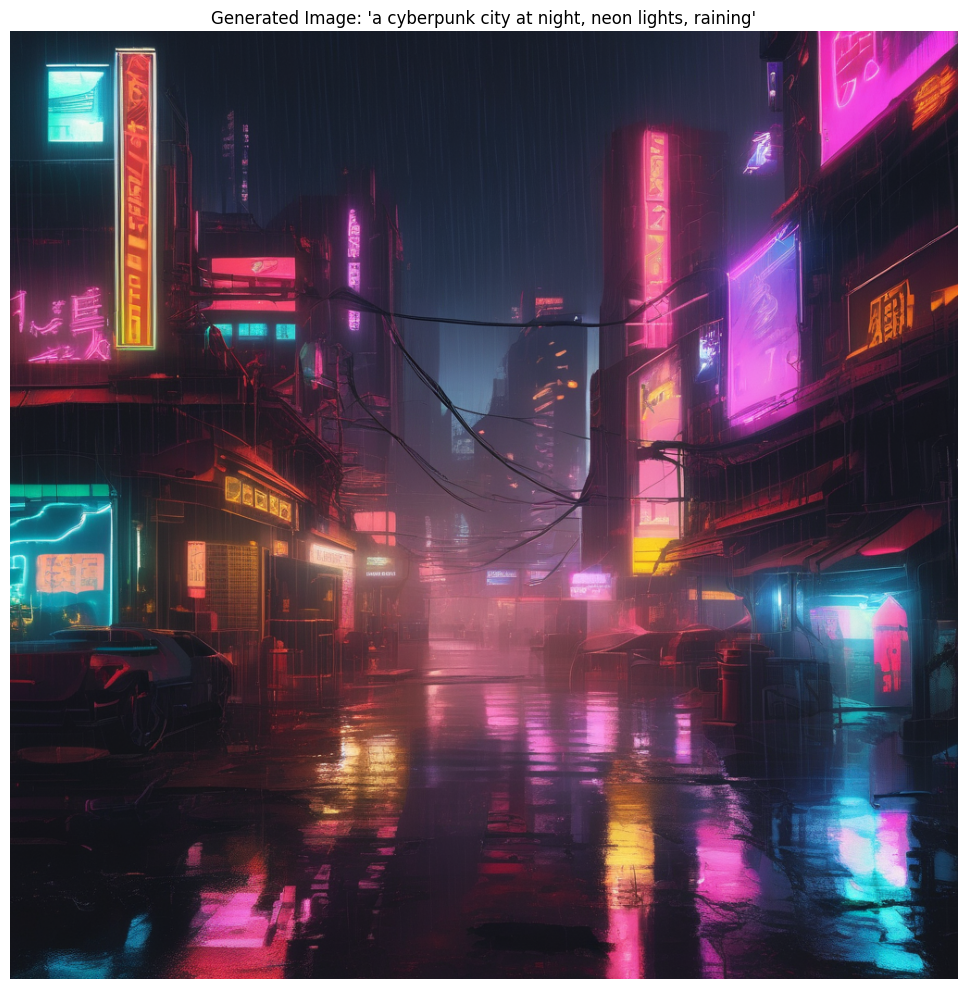

In [16]:
import matplotlib.pyplot as plt
from PIL import Image

# Load and display
img = Image.open("output.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.title("Generated Image: 'a cyberpunk city at night, neon lights, raining'", fontsize=12)
plt.tight_layout()
plt.show()

# Dataset

In [1]:
import kagglehub
path = kagglehub.dataset_download("saibhossain/augmented-celebrity-face-6144")
print("Path to dataset files:", path)

Mounting files to /kaggle/input/augmented-celebrity-face-6144...
Path to dataset files: /kaggle/input/augmented-celebrity-face-6144


In [2]:
import kagglehub
path = kagglehub.dataset_download("newsaib5/celebrity-face-small-data")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/celebrity-face-small-data


In [3]:
import kagglehub
path = kagglehub.dataset_download("lamsimon/celebahq")
print("Path to dataset files:", path)

Mounting files to /kaggle/input/celebahq...
Path to dataset files: /kaggle/input/celebahq


In [4]:
import kagglehub
path = kagglehub.dataset_download("badasstechie/celebahq-resized-256x256")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/celebahq-resized-256x256


In [5]:
import kagglehub
path = kagglehub.dataset_download("vishesh1412/celebrity-face-image-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/celebrity-face-image-dataset


In [6]:
import kagglehub
path = kagglehub.dataset_download("yaswanthgali/sport-celebrity-image-classification")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sport-celebrity-image-classification


In [7]:
import kagglehub
path = kagglehub.dataset_download("jessicali9530/celeba-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/celeba-dataset


In [8]:
import kagglehub
path = kagglehub.dataset_download("basavarajnh/sports-celebrity-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sports-celebrity-dataset


In [9]:
import kagglehub
path = kagglehub.dataset_download("murtadhanajim/facial-symmetry-in-celebrities")
print("Path to dataset files:", path)

Mounting files to /kaggle/input/facial-symmetry-in-celebrities...
Path to dataset files: /kaggle/input/facial-symmetry-in-celebrities


In [10]:
import kagglehub
path = kagglehub.dataset_download("dmitriypushkarev/cineface10")
print("Path to dataset files:", path)

Mounting files to /kaggle/input/cineface10...
Path to dataset files: /kaggle/input/cineface10


## Setup dependency 

In [11]:
!pip install torch torchvision accelerate diffusers transformers einops

In [12]:
import os
from pathlib import Path

dataset_roots = [
    "/kaggle/input/augmented-celebrity-face-6144",
    "/kaggle/input/celebahq",
    "/kaggle/input/celebahq-resized-256x256",
    "/kaggle/input/celebrity-face-image-dataset",
    "/kaggle/input/celebrity-face-small-data",
    "/kaggle/input/cineface10",
    "/kaggle/input/facial-symmetry-in-celebrities",
    "/kaggle/input/sport-celebrity-image-classification",
    "/kaggle/input/sports-celebrity-dataset",
    "/kaggle/input/celeba-dataset"
]

image_exts = {".jpg", ".jpeg", ".png"}

total_count = 0

for root in dataset_roots:
    root_path = Path(root)
    if not root_path.exists():
        print(f" Warning: {root} does not exist. Skipping.")
        continue

    count = 0
    for file in root_path.rglob("*"):
        if file.is_file() and file.suffix.lower() in image_exts:
            count += 1

    print(f"{root}: {count} images")
    total_count += count

print("\n" + "="*50)
print(f" Total images across all datasets: {total_count}")

/kaggle/input/augmented-celebrity-face-6144: 6656 images
/kaggle/input/celebahq: 30000 images
/kaggle/input/celebahq-resized-256x256: 30000 images
/kaggle/input/celebrity-face-image-dataset: 1800 images
/kaggle/input/cineface10: 44765 images
/kaggle/input/facial-symmetry-in-celebrities: 7637 images
/kaggle/input/sport-celebrity-image-classification: 441 images
/kaggle/input/sports-celebrity-dataset: 993 images
/kaggle/input/celeba-dataset: 202599 images

 Total images across all datasets: 324891


In [1]:
import os
from pathlib import Path
from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.utils as vutils
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)


Using device: cuda


In [2]:
dataset_roots = [
    "/kaggle/input/augmented-celebrity-face-6144",
    "/kaggle/input/celebahq",
    "/kaggle/input/celebahq-resized-256x256",
    "/kaggle/input/celebrity-face-image-dataset",
    "/kaggle/input/celebrity-face-small-data",
    "/kaggle/input/cineface10",
    "/kaggle/input/facial-symmetry-in-celebrities",
    "/kaggle/input/sport-celebrity-image-classification",
    "/kaggle/input/sports-celebrity-dataset",
    "/kaggle/input/celeba-dataset"
]

class FaceDataset(Dataset):
    def __init__(self, roots, image_size=256):
        self.paths = []
        exts = {".jpg", ".jpeg", ".png"}

        for r in roots:
            r = Path(r)
            if not r.exists():
                print(f"Missing: {r}")
                continue
            for p in r.rglob("*"):
                if p.suffix.lower() in exts:
                    self.paths.append(p)

        print(f"Total images collected: {len(self.paths)}")

        self.tf = T.Compose([
            T.Resize((image_size, image_size)),
            T.RandomHorizontalFlip(),
            T.ToTensor(),
            T.Normalize([0.5]*3, [0.5]*3)
        ])

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        img = self.tf(img)
        return img

dataset = FaceDataset(dataset_roots)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

x = next(iter(loader))
print("Batch shape:", x.shape)   # [B, 3, 256, 256]

Total images collected: 325403
Batch shape: torch.Size([8, 3, 256, 256])


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
from tqdm import tqdm

# --- 1. DIFFUSION UTILITIES (The Math) ---
class DiffusionUtils:
    def __init__(self, timesteps=1000, device="cuda"):
        self.timesteps = timesteps
        self.device = device
        
        # Define beta schedule (linear increase in noise)
        self.beta = torch.linspace(1e-4, 0.02, timesteps).to(device)
        self.alpha = 1.0 - self.beta
        self.alpha_hat = torch.cumprod(self.alpha, dim=0) # Cumulative product

    def noise_images(self, x, t):
        """Adds noise to a clean image x at timestep t"""
        sqrt_alpha_hat = torch.sqrt(self.alpha_hat[t])[:, None, None, None]
        sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alpha_hat[t])[:, None, None, None]
        epsilon = torch.randn_like(x)
        
        # x_t = sqrt(alpha_hat) * x_0 + sqrt(1 - alpha_hat) * noise
        return sqrt_alpha_hat * x + sqrt_one_minus_alpha_hat * epsilon, epsilon

    def sample_timesteps(self, n):
        """Get random timesteps for training batch"""
        return torch.randint(low=1, high=self.timesteps, size=(n,), device=self.device)

    @torch.no_grad()
    def sample(self, model, n, img_size):
        """Generates new images from pure noise"""
        print(f"Sampling {n} new images....")
        model.eval()
        with torch.no_grad():
            x = torch.randn((n, 3, img_size, img_size)).to(self.device)
            
            # Reverse loop: T -> 0
            for i in tqdm(reversed(range(1, self.timesteps)), position=0):
                t = (torch.ones(n) * i).long().to(self.device)
                predicted_noise = model(x, t)
                
                alpha = self.alpha[t][:, None, None, None]
                alpha_hat = self.alpha_hat[t][:, None, None, None]
                beta = self.beta[t][:, None, None, None]
                
                if i > 1:
                    noise = torch.randn_like(x)
                else:
                    noise = torch.zeros_like(x)
                
                # The Algorithm to remove noise step-by-step
                # x_{t-1} = 1/sqrt(alpha) * (x_t - ((1-alpha)/sqrt(1-alpha_hat)) * predicted_noise) + sqrt(beta) * noise
                x = (1 / torch.sqrt(alpha)) * (x - ((1 - alpha) / (torch.sqrt(1 - alpha_hat))) * predicted_noise) + torch.sqrt(beta) * noise
                
        model.train()
        
        # Un-normalize from [-1, 1] to [0, 1]
        x = (x.clamp(-1, 1) + 1) / 2
        return x

# --- 2. THE ARCHITECTURE (U-Net) ---

class SelfAttention(nn.Module):
    """Helps the model understand global structure (like eyes match)"""
    def __init__(self, channels, size):
        super(SelfAttention, self).__init__()
        self.channels = channels
        self.size = size
        self.mha = nn.MultiheadAttention(channels, 4, batch_first=True)
        self.ln = nn.LayerNorm([channels])
        self.ff_self = nn.Sequential(
            nn.LayerNorm([channels]),
            nn.Linear(channels, channels),
            nn.GELU(),
            nn.Linear(channels, channels),
        )

    def forward(self, x):
        # Reshape for Attention: (Batch, Channels, Height, Width) -> (Batch, Height*Width, Channels)
        x = x.view(-1, self.channels, self.size * self.size).swapaxes(1, 2)
        x_ln = self.ln(x)
        attention_value, _ = self.mha(x_ln, x_ln, x_ln)
        attention_value = attention_value + x
        attention_value = self.ff_self(self.ln(attention_value)) + attention_value
        return attention_value.swapaxes(2, 1).view(-1, self.channels, self.size, self.size)

class DoubleConv(nn.Module):
    """Basic block: Conv -> GroupNorm -> GELU -> Conv -> GroupNorm -> GELU"""
    def __init__(self, in_channels, out_channels, mid_channels=None, residual=False):
        super().__init__()
        self.residual = residual
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.GroupNorm(1, mid_channels),
            nn.GELU(),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.GroupNorm(1, out_channels),
        )

    def forward(self, x):
        if self.residual:
            return F.gelu(x + self.double_conv(x))
        else:
            return self.double_conv(x)

class Down(nn.Module):
    """Downscaling with maxpool then double conv"""
    def __init__(self, in_channels, out_channels, emb_dim=256):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, in_channels, residual=True),
            DoubleConv(in_channels, out_channels),
        )
        # Layer to process time embedding
        self.emb_layer = nn.Sequential(
            nn.SiLU(),
            nn.Linear(emb_dim, out_channels),
        )

    def forward(self, x, t):
        # Downsample
        x = self.maxpool_conv(x)
        # Inject Time Embedding (Broadcast to image size)
        emb = self.emb_layer(t)[:, :, None, None].repeat(1, 1, x.shape[-2], x.shape[-1])
        return x + emb

class Up(nn.Module):
    """Upscaling then double conv"""
    def __init__(self, in_channels, out_channels, emb_dim=256):
        super().__init__()
        self.up = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        self.conv = nn.Sequential(
            DoubleConv(in_channels, in_channels, residual=True),
            DoubleConv(in_channels, out_channels, in_channels // 2),
        )
        self.emb_layer = nn.Sequential(
            nn.SiLU(),
            nn.Linear(emb_dim, out_channels),
        )

    def forward(self, x, skip_x, t):
        x = self.up(x)
        x = torch.cat([skip_x, x], dim=1) # Concatenate skip connection
        x = self.conv(x)
        emb = self.emb_layer(t)[:, :, None, None].repeat(1, 1, x.shape[-2], x.shape[-1])
        return x + emb

class UNet(nn.Module):
    def __init__(self, c_in=3, c_out=3, time_dim=256, device="cuda"):
        super().__init__()
        self.device = device
        self.time_dim = time_dim
        
        # Input: 64x64
        self.inc = DoubleConv(c_in, 64)
        
        # Downsampling
        self.down1 = Down(64, 128)  # -> 32x32
        self.sa1 = SelfAttention(128, 32)
        self.down2 = Down(128, 256) # -> 16x16
        self.sa2 = SelfAttention(256, 16)
        self.down3 = Down(256, 256) # -> 8x8
        self.sa3 = SelfAttention(256, 8)

        # Bottleneck
        self.bot1 = DoubleConv(256, 512)
        self.bot2 = DoubleConv(512, 512)
        self.bot3 = DoubleConv(512, 256)

        # Upsampling
        self.up1 = Up(512, 128) # -> 16x16
        self.sa4 = SelfAttention(128, 16)
        self.up2 = Up(256, 64)  # -> 32x32
        self.sa5 = SelfAttention(64, 32)
        self.up3 = Up(128, 64)  # -> 64x64
        self.sa6 = SelfAttention(64, 64)
        
        self.outc = nn.Conv2d(64, c_out, kernel_size=1)

    def pos_encoding(self, t, channels):
        """Sinusoidal Positional Encoding for Timesteps"""
        inv_freq = 1.0 / (
            10000
            ** (torch.arange(0, channels, 2, device=self.device).float() / channels)
        )
        pos_enc_a = torch.sin(t.repeat(1, channels // 2) * inv_freq)
        pos_enc_b = torch.cos(t.repeat(1, channels // 2) * inv_freq)
        pos_enc = torch.cat([pos_enc_a, pos_enc_b], dim=-1)
        return pos_enc

    def forward(self, x, t):
        # Flatten timestep t to basic (Batch,) shape if needed
        t = t.unsqueeze(-1).type(torch.float)
        # Calculate time embeddings
        t = self.pos_encoding(t, self.time_dim)
        
        x1 = self.inc(x)
        x2 = self.down1(x1, t)
        x2 = self.sa1(x2)
        x3 = self.down2(x2, t)
        x3 = self.sa2(x3)
        x4 = self.down3(x3, t)
        x4 = self.sa3(x4)

        x4 = self.bot1(x4)
        x4 = self.bot2(x4)
        x4 = self.bot3(x4)

        x = self.up1(x4, x3, t)
        x = self.sa4(x)
        x = self.up2(x, x2, t)
        x = self.sa5(x)
        x = self.up3(x, x1, t)
        x = self.sa6(x)
        output = self.outc(x)
        return output

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, utils
import os
import random
from PIL import Image
from tqdm import tqdm


# --- CONFIGURATION ---
# Path to your dataset (Folder containing images)
DATASET_PATH = "/kaggle/input/augmented-celebrity-face-6144/Augmented_Dataset"
OUTPUT_DIR = "./ddpm_faces_output"
CHECKPOINT_DIR = "./ddpm_checkpoints"
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# Hyperparameters
IMG_SIZE = 64        # 64x64 is standard for "from scratch" learning.
BATCH_SIZE = 18      # Reduced from 128 to 64 (32 per GPU) to prevent OOM
TIMESTEPS = 1000     # How many steps to destroy/create the image
LR = 3e-4            # Learning Rate
EPOCHS = 50          # Number of training epochs
LOG_INTERVAL = 100
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Running on {DEVICE}")

# --- 1. DATASET LOADING ---
class SimpleImageDataset(torch.utils.data.Dataset):
    def __init__(self, root, transform=None):
        self.transform = transform
        self.images = []
        # Recursively find all images
        for dirpath, _, filenames in os.walk(root):
            for f in filenames:
                if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                    self.images.append(os.path.join(dirpath, f))
        print(f"Found {len(self.images)} images.")
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        # Robust loading loop (tries random image if one is corrupt)
        while True:
            try:
                img_path = self.images[idx]
                img = Image.open(img_path).convert("RGB")
                if self.transform:
                    img = self.transform(img)
                return img
            except:
                idx = random.randint(0, len(self.images) - 1)

# Transformations: Resize to square and normalize to [-1, 1]
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]) 
])

dataset = SimpleImageDataset(DATASET_PATH, transform)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

# --- 2. TRAINING LOOP ---
def train():
    # Clear cache before starting
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    print("Initializing Diffusion Model...")
    
    # 1. Initialize Model
    model = UNet(device=DEVICE)
    
    # 2. Check for Multiple GPUs
    if torch.cuda.device_count() > 1:
        print(f"🚀 Found {torch.cuda.device_count()} GPUs! Enabling DataParallel.")
        model = nn.DataParallel(model)
    
    # 3. Move to Device
    model = model.to(DEVICE)
    
    optimizer = optim.Adam(model.parameters(), lr=LR)
    loss_fn = nn.MSELoss()
    
    # Initialize Scaler for Mixed Precision (fp16)
    # This reduces VRAM usage significantly
    scaler = torch.cuda.amp.GradScaler()
    
    diffusion = DiffusionUtils(TIMESTEPS, device=DEVICE)
    
    print("Starting Training...")
    
    for epoch in range(EPOCHS):
        model.train()
        progress_bar = tqdm(enumerate(dataloader), total=len(dataloader), desc=f"Epoch {epoch+1}")
        
        for i, batch_imgs in progress_bar:
            batch_imgs = batch_imgs.to(DEVICE)
            current_batch_size = batch_imgs.shape[0]
            
            # 1. Sample random timesteps
            t = diffusion.sample_timesteps(current_batch_size)
            
            # 2. Add noise to images
            x_noisy, noise = diffusion.noise_images(batch_imgs, t)
            
            optimizer.zero_grad()
            
            # 3. Predict the noise using Mixed Precision
            with torch.cuda.amp.autocast():
                noise_pred = model(x_noisy, t)
                # 4. Calculate Loss
                loss = loss_fn(noise_pred, noise)
            
            # Scale loss and backpropagate
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            if i % LOG_INTERVAL == 0:
                progress_bar.set_postfix({'Loss': f"{loss.item():.4f}"})
        
        # Sample images at end of epoch
        print(f"Epoch {epoch+1} finished. Generating samples...")
        
        # Handle DataParallel wrapping for sampling
        model_to_sample = model.module if isinstance(model, nn.DataParallel) else model
        samples = diffusion.sample(model_to_sample, n=16, img_size=IMG_SIZE)
        
        utils.save_image(samples, f"{OUTPUT_DIR}/epoch_{epoch+1}.png", nrow=4, normalize=True, value_range=(0, 1))
        
        # Save checkpoint
        torch.save(model.state_dict(), f"{CHECKPOINT_DIR}/diffusion_epoch_{epoch}.pth")

if __name__ == "__main__":
    train()

Running on cuda
Found 6656 images.
Initializing Diffusion Model...


/tmp/ipykernel_55/1188198455.py:93: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


🚀 Found 2 GPUs! Enabling DataParallel.
Starting Training...


Epoch 1:   0%|          | 0/416 [00:00<?, ?it/s]/tmp/ipykernel_55/1188198455.py:116: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 1: 100%|██████████| 416/416 [03:53<00:00,  1.78it/s, Loss=0.0265]


Epoch 1 finished. Generating samples...
Sampling 16 new images....


999it [03:42,  4.49it/s]
Epoch 2: 100%|██████████| 416/416 [03:17<00:00,  2.10it/s, Loss=0.0201]


Epoch 2 finished. Generating samples...
Sampling 16 new images....


999it [03:42,  4.49it/s]
Epoch 3: 100%|██████████| 416/416 [03:17<00:00,  2.10it/s, Loss=0.0172]


Epoch 3 finished. Generating samples...
Sampling 16 new images....


999it [03:42,  4.49it/s]
Epoch 4: 100%|██████████| 416/416 [03:19<00:00,  2.09it/s, Loss=0.0310]


Epoch 4 finished. Generating samples...
Sampling 16 new images....


999it [03:42,  4.48it/s]
Epoch 5: 100%|██████████| 416/416 [03:18<00:00,  2.10it/s, Loss=0.0530]


Epoch 5 finished. Generating samples...
Sampling 16 new images....


999it [03:42,  4.49it/s]
Epoch 6: 100%|██████████| 416/416 [03:19<00:00,  2.08it/s, Loss=0.0539]


Epoch 6 finished. Generating samples...
Sampling 16 new images....


999it [03:42,  4.48it/s]
Epoch 7: 100%|██████████| 416/416 [03:20<00:00,  2.07it/s, Loss=0.0356]


Epoch 7 finished. Generating samples...
Sampling 16 new images....


698it [02:35,  4.49it/s]